In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from environment import get_all_scenes
from HierarchicalPRM import HierarchicalPRM
from lectures.IPLazyPRM import LazyPRM
from lectures.IPBasicPRM import BasicPRM
from lectures.IPEnvironment import CollisionChecker
from hierarchical_visualize import  visualize_hierarchical_planning
from scipy.spatial.distance import euclidean

In [2]:
# ---- Konfiguration ----
config_high = {
    "ntry": 10,
}

config_low_lazy = {
    "initialRoadmapSize": 15,
    "updateRoadmapSize": 10,
    "kNearest": 8,
    "maxIterations": 10
}

config_low_basic = {
    "numNodes": 30,
    "radius": 4
}

scenes = get_all_scenes()
# %%
# 📁 Ordner anlegen
plot_dir = "plots_hierarchical"
results_dir = "benchmark_results"
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

In [3]:
def run_benchmark(subplanner_type, config_local):
    results = []
    SubPlanner = LazyPRM if subplanner_type == "Lazy" else BasicPRM
    print(f"\n🔁 Starte Benchmarks mit Subplanner: {subplanner_type}")

    for scene_name, (scene, limits, (start_pos, goal_pos)) in scenes:
        print(f"\n🔍 Szene: {scene_name}")
        start = [list(start_pos)]
        goal = [list(goal_pos)]

        collision_checker = CollisionChecker(scene, limits)

        planner = HierarchicalPRM(collision_checker, SubPlanner(collision_checker), limits=limits)
        t0 = time.time()
        path = planner.planPath(start, goal, {
            "ntry": config_high["ntry"],
            "subPlannerConfig": config_local
        })
        t1 = time.time()

        # 🔒 Robuste Pfadverarbeitung
        coords = [tuple(p) for p in path if isinstance(p, (list, tuple)) and len(p) == 2] if isinstance(path, list) else []
        euclidean_length = sum(euclidean(a, b) for a, b in zip(coords[:-1], coords[1:])) if coords else 0

        if not coords:
            print(f"❌ Kein Pfad gefunden in Szene: {scene_name}")
            result = {
                "planner": f"Hierarchical-{subplanner_type}",
                "scene": scene_name,
                "hasPath": False,
                "length": 0,
                "euclidean_length": 0,
                "time": t1 - t0,
                "nodes": 0,
                "edges": 0,
                "roadmap_size": 0
            }
            results.append(result)
            continue

        print(f"✅ Pfad gefunden in Szene: {scene_name}, Länge: {len(coords)}")

        # 📸 Visualisierung
        visualize_hierarchical_planning(planner, collision_checker, config_local, start[0], goal[0])
        filename = f"{scene_name}_Hierarchical-{subplanner_type}.png".replace(" ", "_")
        plt.savefig(os.path.join(plot_dir, filename), dpi=300)
        plt.close()

        result = {
            "planner": f"Hierarchical-{subplanner_type}",
            "scene": scene_name,
            "hasPath": True,
            "length": len(coords),
            "euclidean_length": euclidean_length,
            "time": t1 - t0,
            "nodes": len(planner.graph.nodes),
            "edges": len(planner.graph.edges),
            "roadmap_size": planner.graph.size()
        }
        results.append(result)

    return results



🔁 Starte Benchmarks mit Subplanner: Lazy

🔍 Szene: U-Shape

🔎 Prüfe Punkt 0 bei [4.545278331282637, 2.7717138105860846]
🛡️ Punkt 0 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 1 bei [4.035730087390939, 7.924633944181768]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 1 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 2 bei [2.802285523742431, 5.012721628695834]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 2 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 3 bei [11.670806747028847, 16.23856988039785]
🛡️ Punkt 3 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 4 bei [15.259577999534743, 4.716156642242895]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 4 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 5 bei [8.190012567499597, 18.68900326525541]
   ✅ Sichtverbindung zu Guard 3 gefunden
❌ Punkt 5 verworfen (nur eine Sichtverbindung zu Guard 3)

🔎 Prüfe Punkt 6 bei [16.932955393554945, 6.90214

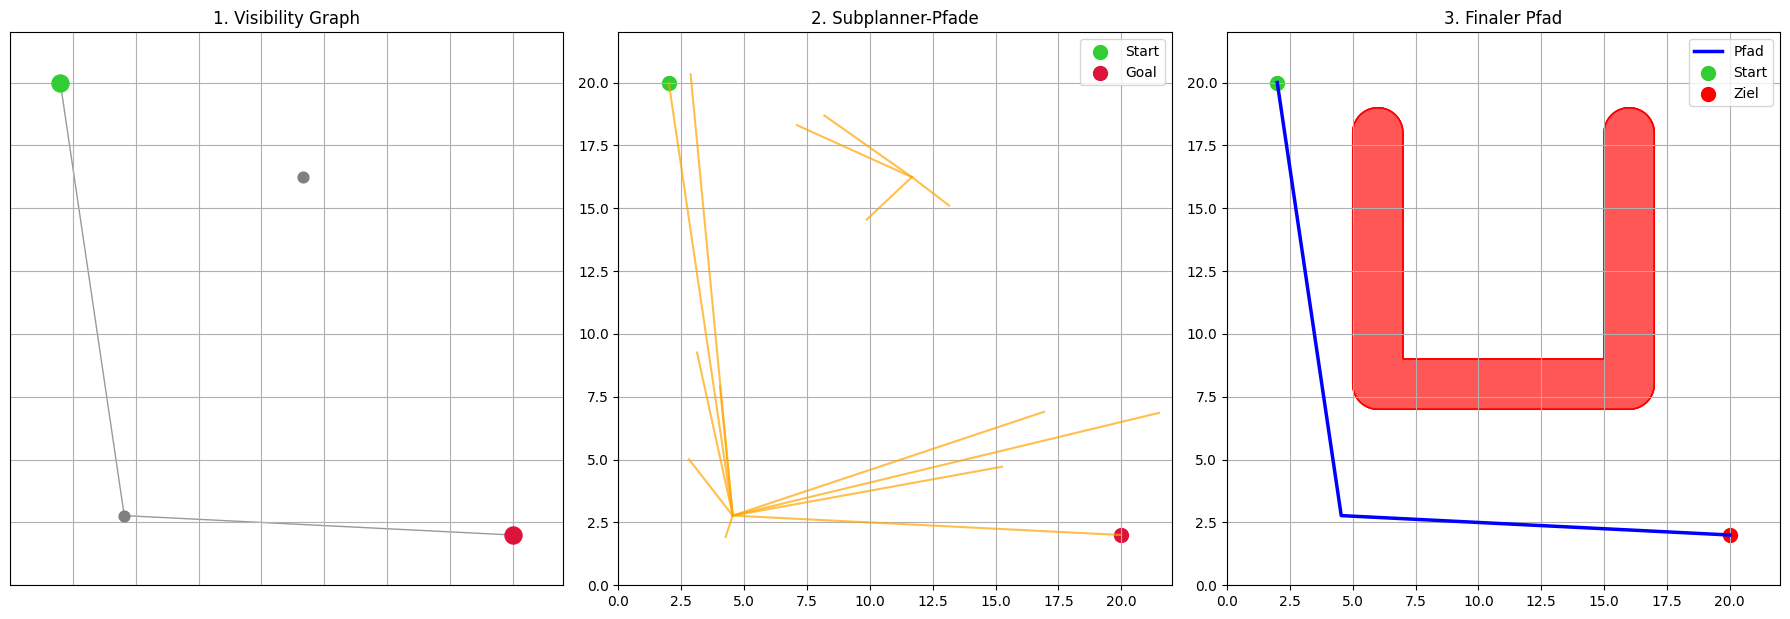


🔍 Szene: L-Shape

🔎 Prüfe Punkt 0 bei [3.2608757332911855, 13.909400677022036]
🛡️ Punkt 0 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 1 bei [1.7010981710358912, 10.831184385007095]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 1 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 2 bei [5.326425201185016, 0.06438343063720398]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 2 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 3 bei [3.880058871862782, 18.740531621768735]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 3 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 4 bei [8.099146336724207, 6.6915700864987375]
🛡️ Punkt 4 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 5 bei [3.5724880248738, 7.638604177904222]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 5 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 6 bei [17.15829102007989, 11.366619891266575]
🛡️ Punkt 6 als neuer Guard 

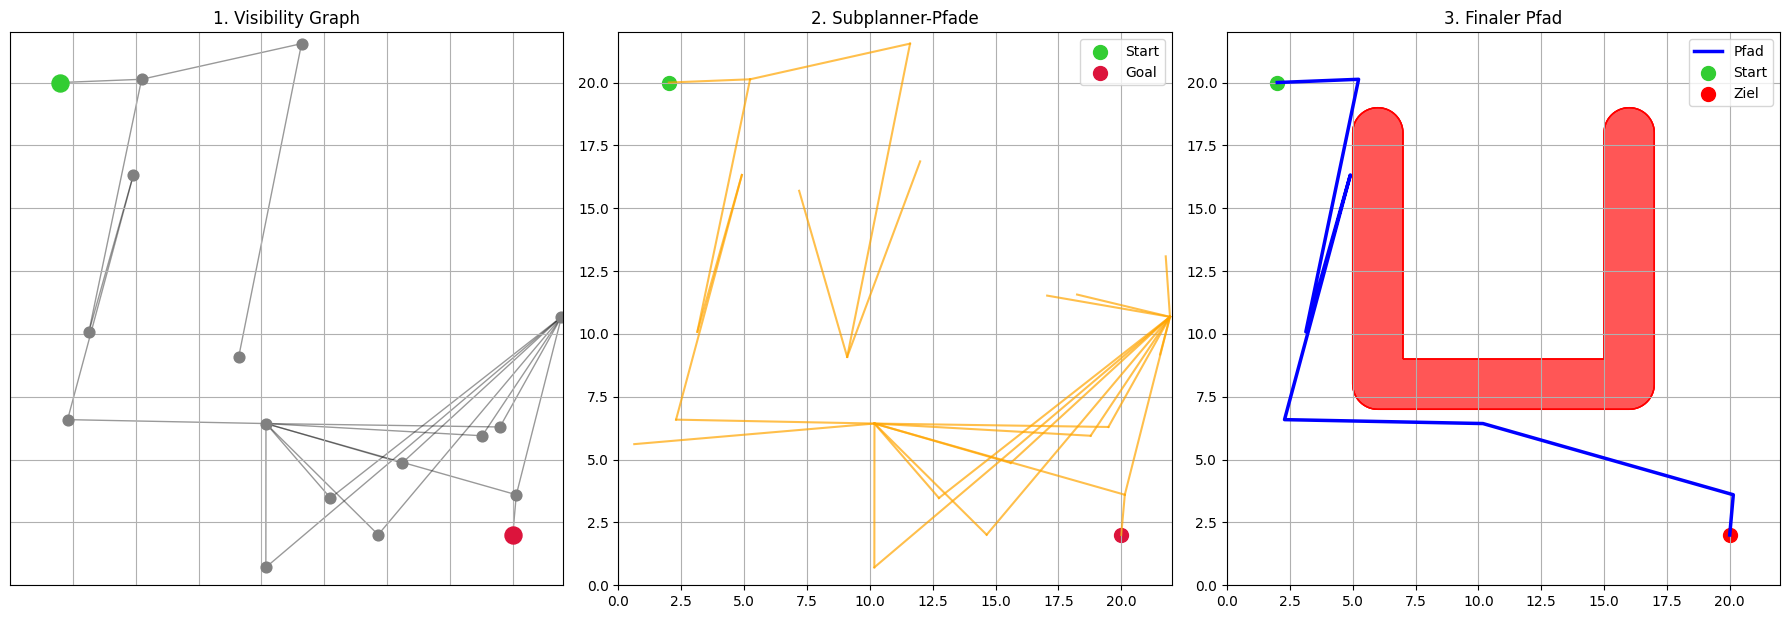


🔍 Szene: L-Shape

🔎 Prüfe Punkt 0 bei [16.1746840981174, 16.455438247723475]
🛡️ Punkt 0 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 1 bei [6.40591429155109, 1.4751148892998787]
🛡️ Punkt 1 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 2 bei [10.177514567380573, 0.2603391426397752]
   ✅ Sichtverbindung zu Guard 1 gefunden
❌ Punkt 2 verworfen (nur eine Sichtverbindung zu Guard 1)

🔎 Prüfe Punkt 3 bei [10.789741413895143, 5.049307828053624]
   ✅ Sichtverbindung zu Guard 1 gefunden
❌ Punkt 3 verworfen (nur eine Sichtverbindung zu Guard 1)

🔎 Prüfe Punkt 4 bei [6.650037149760418, 2.792437368418443]
   ✅ Sichtverbindung zu Guard 1 gefunden
❌ Punkt 4 verworfen (nur eine Sichtverbindung zu Guard 1)

🔎 Prüfe Punkt 5 bei [19.93333121108748, 3.766036699343851]
   ✅ Sichtverbindung zu Guard 0 gefunden
   ✅ Sichtverbindung zu Guard 1 gefunden
🔗 Punkt 5 als Connection verbunden mit Guards 0 und 1

🔎 Prüfe Punkt 6 bei [3.451345918040014, 4.15678717094

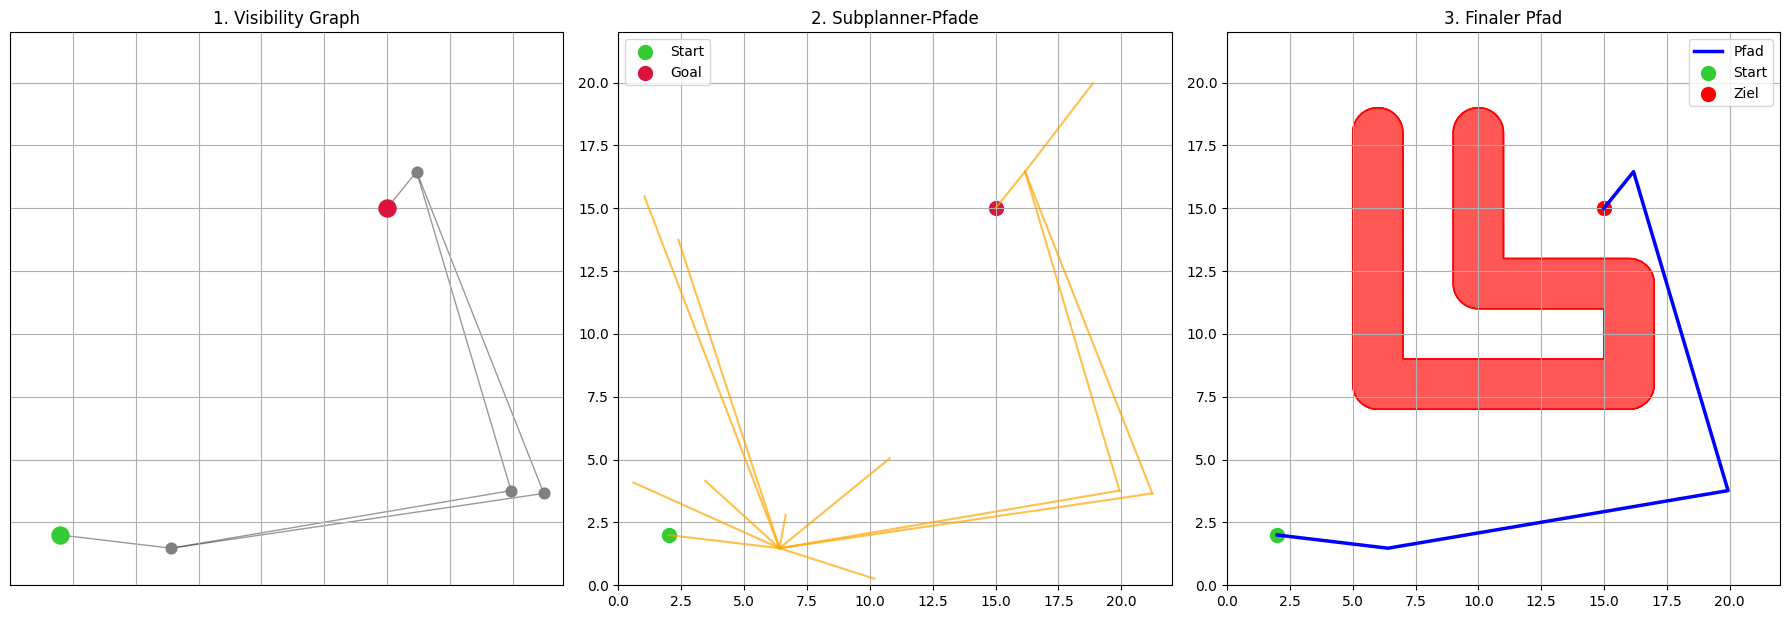


🔍 Szene: Corridor

🔎 Prüfe Punkt 0 bei [5.171893715127767, 3.5283046202112]
🛡️ Punkt 0 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 1 bei [13.684959687982126, 12.585403351973579]
🛡️ Punkt 1 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 2 bei [17.98653876057753, 6.990622805750073]
🛡️ Punkt 2 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 3 bei [1.551612827280715, 13.834652639600254]
🛡️ Punkt 3 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 4 bei [18.849025144989454, 19.65346497324723]
   ✅ Sichtverbindung zu Guard 2 gefunden
❌ Punkt 4 verworfen (nur eine Sichtverbindung zu Guard 2)

🔎 Prüfe Punkt 5 bei [0.02423265650395523, 13.297678013370485]
   ✅ Sichtverbindung zu Guard 3 gefunden
❌ Punkt 5 verworfen (nur eine Sichtverbindung zu Guard 3)

🔎 Prüfe Punkt 6 bei [19.26452809636135, 1.91556471498455]
   ✅ Sichtverbindung zu Guard 2 gefunden
❌ Punkt 6 verworfen (nur eine Sichtverbindung zu Guard

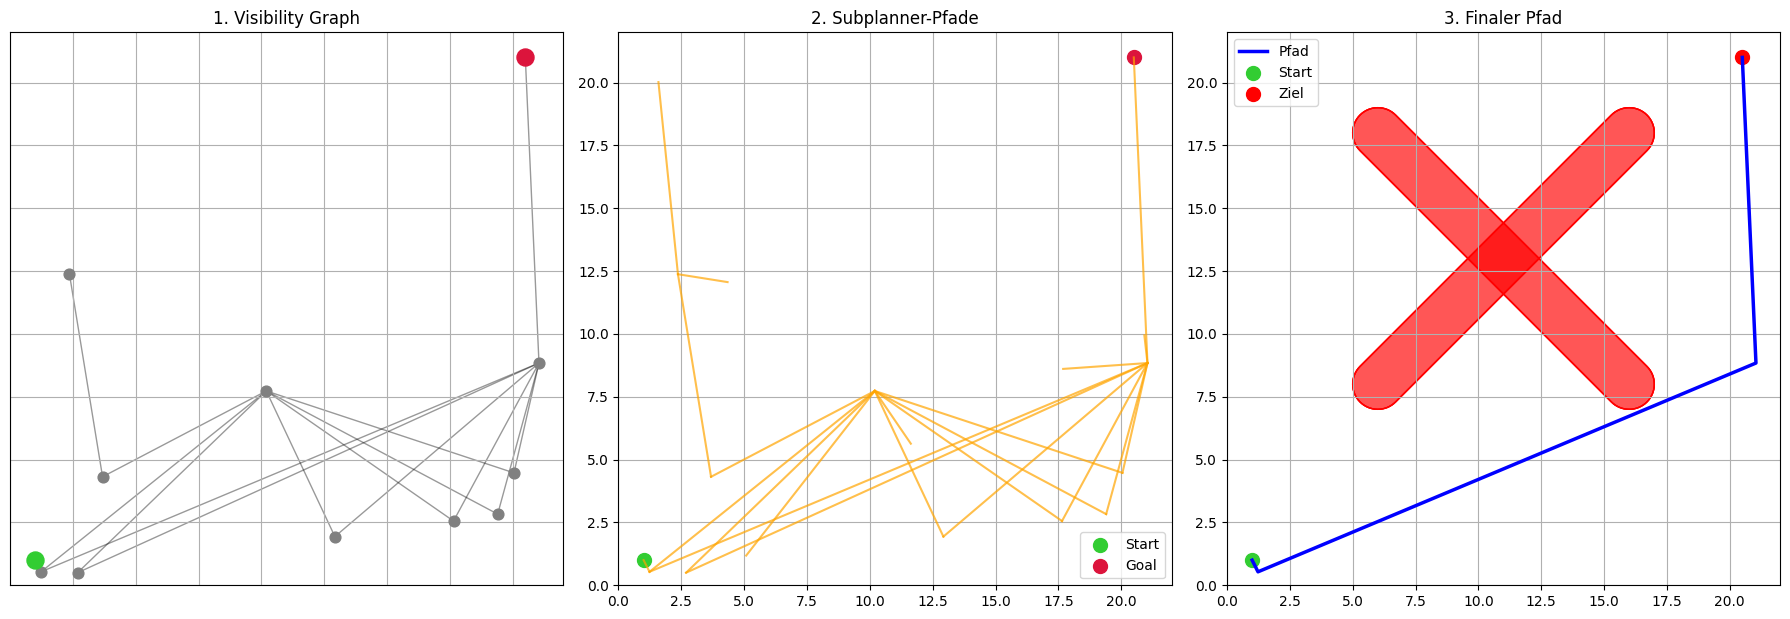


🔍 Szene: Random Obstacles

🔎 Prüfe Punkt 0 bei [13.087464278518466, 0.9861146124040427]
🛡️ Punkt 0 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 1 bei [20.195199159402172, 14.72630784586429]
🛡️ Punkt 1 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 2 bei [9.877083523150555, 12.121683791436679]
🛡️ Punkt 2 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 3 bei [3.8568674479349614, 18.189115615820036]
🛡️ Punkt 3 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 4 bei [18.349376103535967, 0.29508734212170573]
   ✅ Sichtverbindung zu Guard 0 gefunden
   ✅ Sichtverbindung zu Guard 1 gefunden
🔗 Punkt 4 als Connection verbunden mit Guards 0 und 1

🔎 Prüfe Punkt 5 bei [14.074562819572987, 18.219509809688297]
   ✅ Sichtverbindung zu Guard 2 gefunden
❌ Punkt 5 verworfen (nur eine Sichtverbindung zu Guard 2)

🔎 Prüfe Punkt 6 bei [21.201196956323855, 18.800643147398134]
   ✅ Sichtverbindung zu Guard 1 gefunden


In [4]:
# 🔁 Beide Runs durchführen
all_results = []

# Lazy
lazy_results = run_benchmark("Lazy", config_low_lazy)
pd.DataFrame(lazy_results).to_csv(os.path.join(results_dir, "Hierarchical-Lazy_results.csv"), index=False)
all_results.extend(lazy_results)

# Basic
basic_results = run_benchmark("Basic", config_low_basic)
pd.DataFrame(basic_results).to_csv(os.path.join(results_dir, "Hierarchical-Basic_results.csv"), index=False)
all_results.extend(basic_results)

# Zusammengefasst
pd.DataFrame(all_results).to_csv(os.path.join(results_dir, "Hierarchical_ALL_results.csv"), index=False)
print("\n✅ Alle Benchmarks abgeschlossen.")

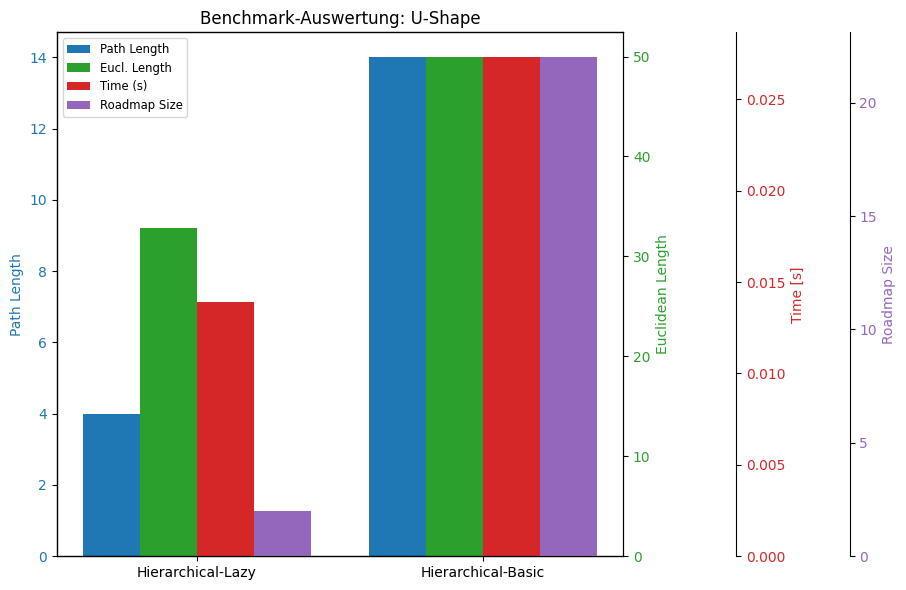

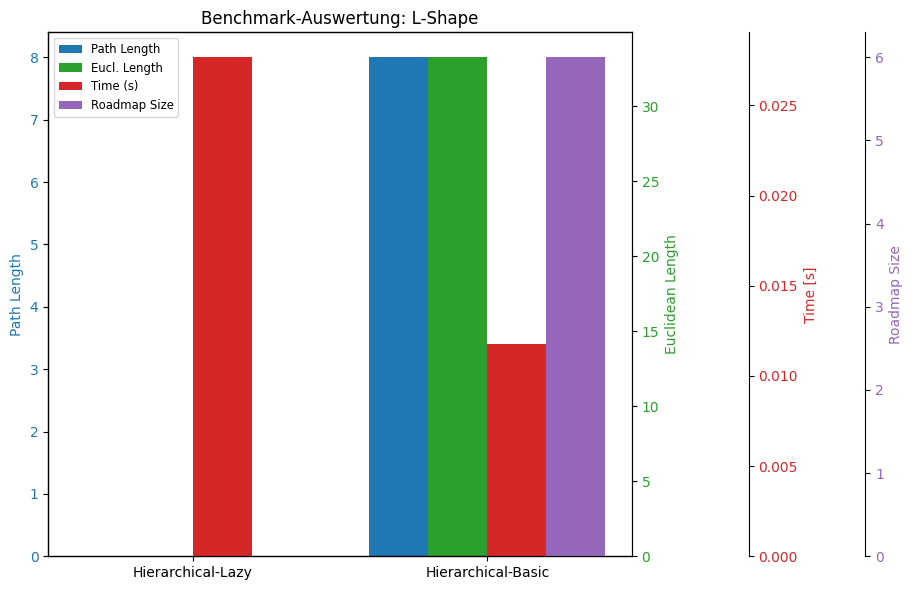

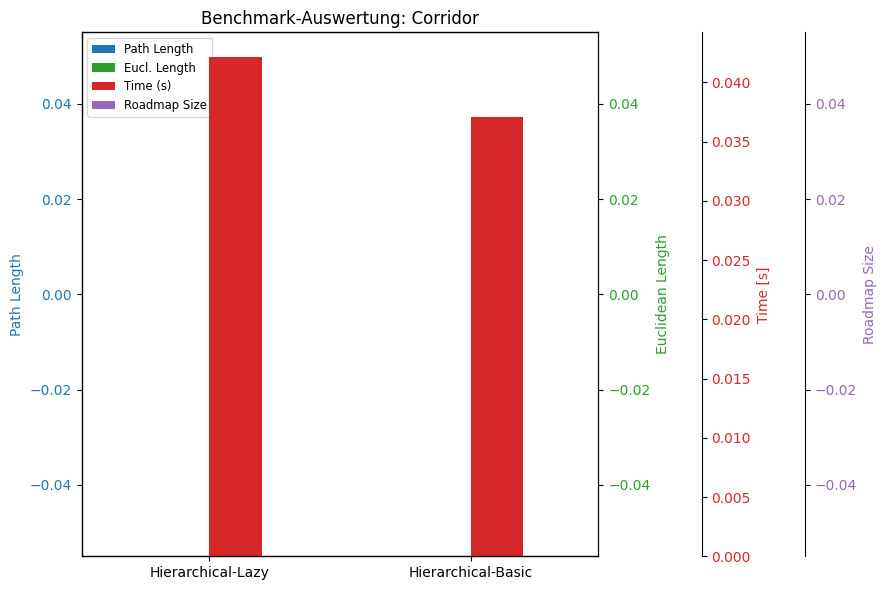

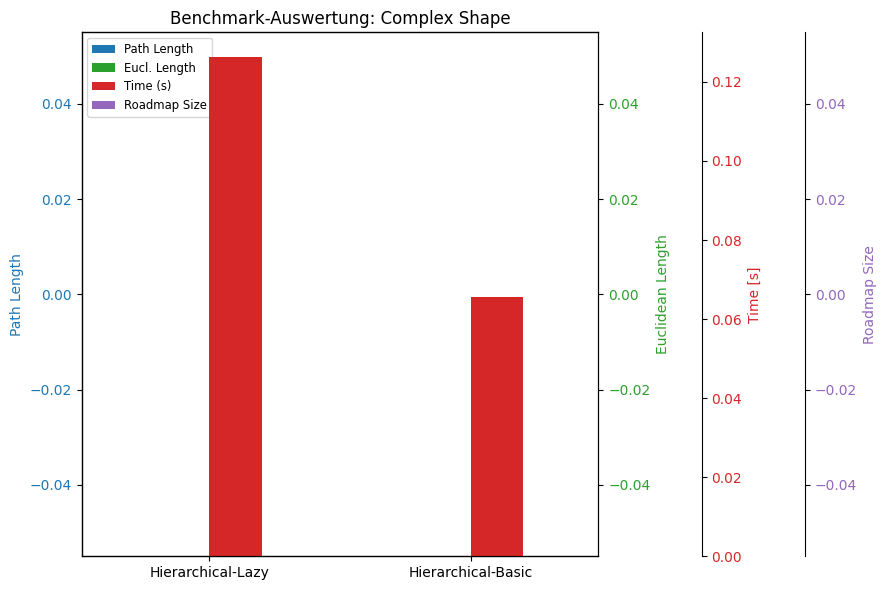

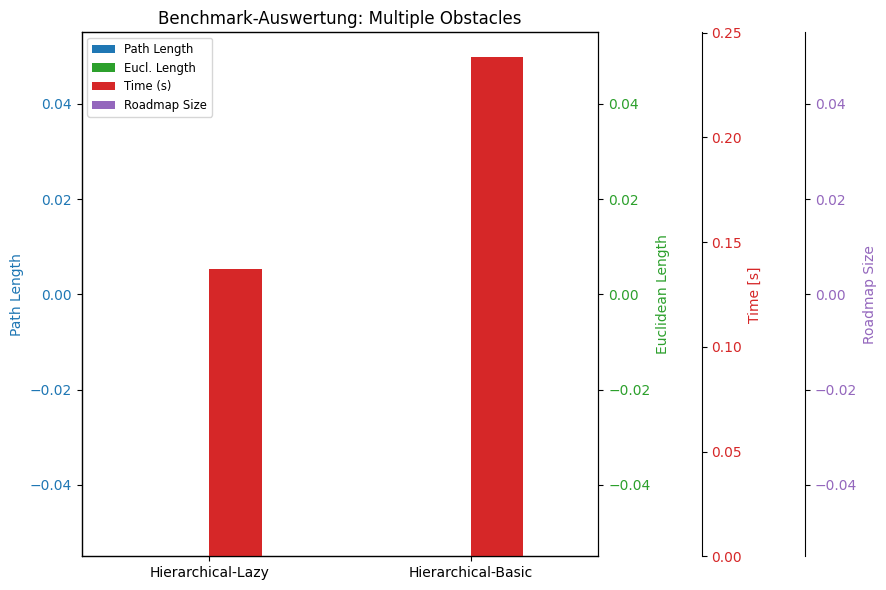

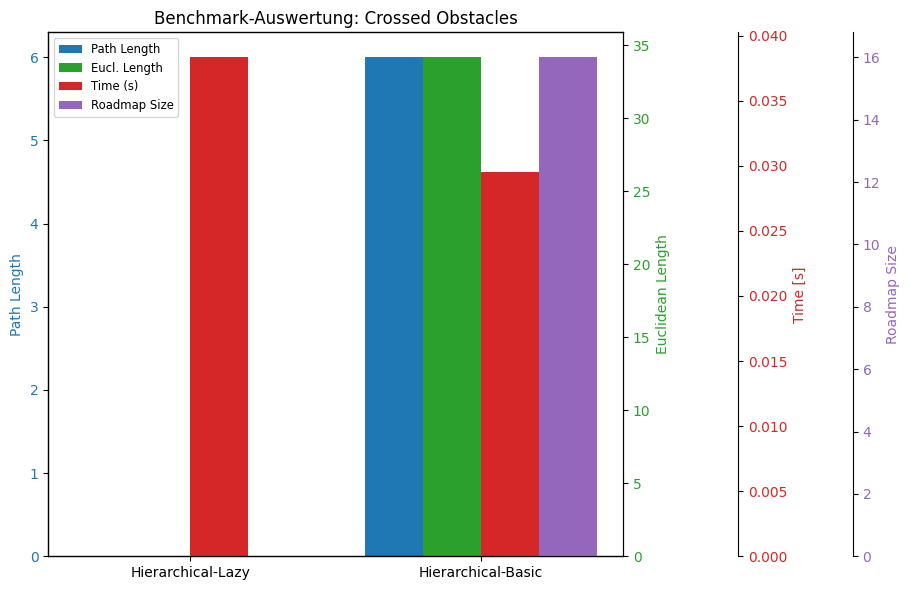

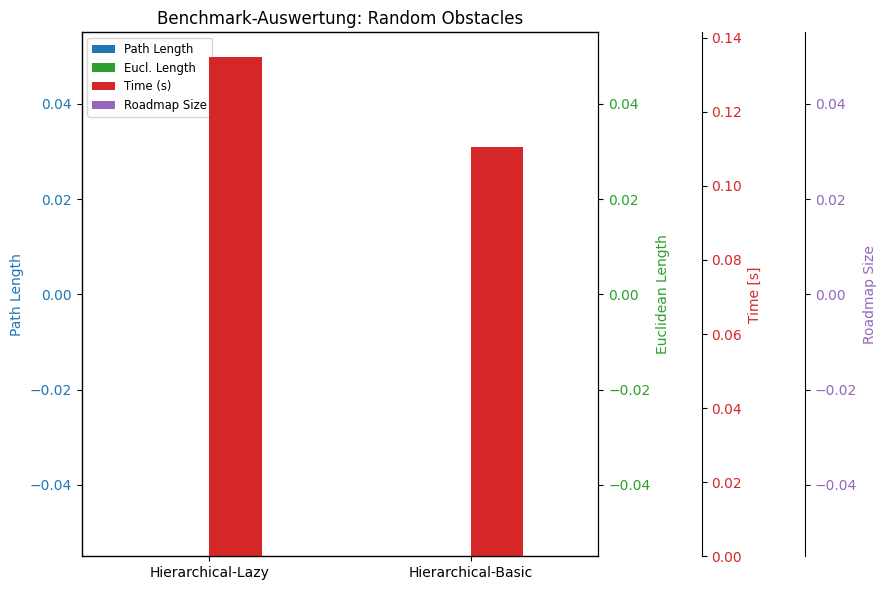

In [5]:
# Visualisierung
result_df = pd.DataFrame(all_results)
for scene in result_df["scene"].unique():
    df = result_df[result_df["scene"] == scene]
    fig, ax1 = plt.subplots(figsize=(10, 6))
    width = 0.2
    idx = np.arange(len(df))

    ax1.bar(idx, df["length"], width, label="Path Length", color="#1f77b4")
    ax1.set_ylabel("Path Length", color="#1f77b4")
    ax1.tick_params(axis='y', labelcolor="#1f77b4")

    ax2 = ax1.twinx()
    ax2.bar(idx + width, df["euclidean_length"], width, label="Eucl. Length", color="#2ca02c")
    ax2.set_ylabel("Euclidean Length", color="#2ca02c")
    ax2.tick_params(axis='y', labelcolor="#2ca02c")

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('axes', 1.2))
    ax3.bar(idx + 2 * width, df["time"], width, label="Time (s)", color="#d62728")
    ax3.set_ylabel("Time [s]", color="#d62728")
    ax3.tick_params(axis='y', labelcolor="#d62728")

    ax4 = ax1.twinx()
    ax4.spines['right'].set_position(('axes', 1.4))
    ax4.bar(idx + 3 * width, df["roadmap_size"], width, label="Roadmap Size", color="#9467bd")
    ax4.set_ylabel("Roadmap Size", color="#9467bd")
    ax4.tick_params(axis='y', labelcolor="#9467bd")

    ax1.set_xticks(idx + 1.5 * width)
    ax1.set_xticklabels(df["planner"].values)
    ax1.set_title(f"Benchmark-Auswertung: {scene}")

    handles, labels = [], []
    for ax in [ax1, ax2, ax3, ax4]:
        h, l = ax.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)
    ax1.legend(handles, labels, loc="upper left", fontsize="small")

    plt.tight_layout()
    plt.show()

In [6]:
# --- Pfadplanung ---
hier_planner = HierarchicalPlanner(
    scene=scenes[0][1][0],  # Nimm die erste Szene
    limits=scenes[0][1][1],
    GlobalPlannerClass=VisibilityPRM,
    LocalPlannerClass=LazyPRM,  # Oder BasicPRM
    config_global=config_high,
    config_local=config_low_lazy  # Oder config_low_basic
)

start = [list(scenes[0][1][2][0])]
goal = [list(scenes[0][1][2][1])]
path = hier_planner.plan_path(start, goal)
if not path:
    print("❌ Kein Pfad gefunden.")
else:
    print("✅ Pfad gefunden mit", len(path), "Punkten")

    # Korrekte Reihenfolge der Initialisierung für die Visualisierung
    hier_planner.solution_path = path  # Statt final_path
    hier_planner.graph = hier_planner.global_planner.graph  # Verwende direkt den globalen Planer-Graph

    collision_checker = CollisionChecker(hier_planner.scene, hier_planner.limits)
    visualize_hierarchical_planning(hier_planner, collision_checker, hier_planner.config_local)


NameError: name 'HierarchicalPlanner' is not defined

In [ ]:
# --- Jede Szene durchlaufen ---
config_low = {
    "initialRoadmapSize": 100,
    "kNearest": 10,
    "maxIterations": 20,
    "updateRoadmapSize": 50
}
for name, (scene, limits, (start_tuple, goal_tuple)) in scenes:
    print(f"\n🔄 Verarbeite Szene: {name}")

    # Start- und Zielposition ins passende Format bringen
    start = [list(start_tuple)]
    goal = [list(goal_tuple)]

    # Kollisionserkennung
    collision_checker = CollisionChecker(scene, limits)

    # Planer initialisieren
    hier_planner = HierarchicalPlanner(
        scene=scene,
        limits=limits,
        GlobalPlannerClass=VisibilityPRM,
        LocalPlannerClass=LazyPRM,
        config_global=config_high,
        config_local=config_low
    )

    # Pfadplanung
    path = hier_planner.plan_path(start, goal)
    if not path:
        print(f"❌ Kein Pfad gefunden in Szene: {name}")
        continue
    else:
        print(f"✅ Pfad gefunden in Szene: {name}, Länge: {len(path)}")

    # Visualisierung vorbereiten (optional, kann deaktiviert werden)
    hier_planner.solution_path = path
    hier_planner.graph = hier_planner.global_planner.graph
    visualize_hierarchical_planning(hier_planner, collision_checker, config_low)

    # Alternativ: Ergebnisse speichern oder zusammenfassen